# Experiments With Convolutional Neural Networks

  I set out with this notebook to conduct a series of experiments with some simple convolutional neural networks and the MNIST data set. The base neural network comes from the example cnn for the CIFAR10 dataset, from the keras github. This has been a very useful exercise to help me learn more about convolutional neural networks.

In [1]:
# Import the libraries that will be used 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

from IPython.display import SVG

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) 

In [2]:
# Set some of the parameters to some initial values.
batch_size = 128
num_classes = 10
epochs = 12

# Input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Basic convolutional model, based on the keras cifar-10 example
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# Compile the basic model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
# Show the summary of the model. This is a really nice feature of keras!
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

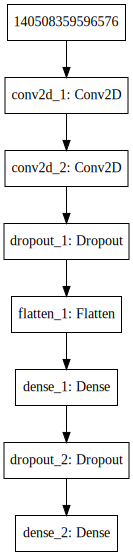

In [7]:
# This is also an interesting way to visualize the model, though not quite as informative
# as model.summary()
SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

# Epoch Experiment
  For the first experiment, the epoch size was varied, to see what effect it would have on the accuracy of this simle model. The epochs range from 5 to 95, incrementing by 5.

In [8]:
# Try different epoch lengths
test_accuracies = []
num_epochs = []

for n in range(5, 100, 5):
    print("Number of epochs: ", n)
    
    model.fit(x_train, y_train, batch_size=batch_size,epochs=n,
         verbose=1,validation_data=(x_test,y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(score[1])
    num_epochs.append(n)

Number of epochs:  5
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 1.1678 - acc: 0.8754 - val_loss: 0.0782 - val_acc: 0.9764
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.1054 - acc: 0.9696 - val_loss: 0.0586 - val_acc: 0.9799
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0711 - acc: 0.9797 - val_loss: 0.0518 - val_acc: 0.9839
Epoch 4/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0554 - acc: 0.9844 - val_loss: 0.0434 - val_acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0442 - acc: 0.9867 - val_loss: 0.0440 - val_acc: 0.9867
Number of epochs:  10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0339 - acc: 0.9897 - val_loss: 0.0446 - v

Epoch 6/25
60000/60000 [==============================] - 9s 158us/step - loss: 0.0142 - acc: 0.9969 - val_loss: 0.1023 - val_acc: 0.9883
Epoch 7/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0149 - acc: 0.9969 - val_loss: 0.0965 - val_acc: 0.9870
Epoch 8/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.0135 - acc: 0.9970 - val_loss: 0.1053 - val_acc: 0.9863
Epoch 9/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.0130 - acc: 0.9971 - val_loss: 0.0881 - val_acc: 0.9880
Epoch 10/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0119 - acc: 0.9973 - val_loss: 0.1202 - val_acc: 0.9875
Epoch 11/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0140 - acc: 0.9968 - val_loss: 0.0823 - val_acc: 0.9869
Epoch 12/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0107 - acc: 0.9975 - val_loss: 0.0935 - val_acc: 0.9874
Epoch 13/25
60000/60000 [====

60000/60000 [==============================] - 9s 156us/step - loss: 0.0085 - acc: 0.9982 - val_loss: 0.1195 - val_acc: 0.9887
Epoch 10/35
60000/60000 [==============================] - 9s 156us/step - loss: 0.0115 - acc: 0.9978 - val_loss: 0.1201 - val_acc: 0.9870
Epoch 11/35
60000/60000 [==============================] - 9s 156us/step - loss: 0.0085 - acc: 0.9984 - val_loss: 0.1318 - val_acc: 0.9883
Epoch 12/35
60000/60000 [==============================] - 9s 157us/step - loss: 0.0084 - acc: 0.9986 - val_loss: 0.1182 - val_acc: 0.9885
Epoch 13/35
60000/60000 [==============================] - 9s 155us/step - loss: 0.0099 - acc: 0.9981 - val_loss: 0.0939 - val_acc: 0.9872
Epoch 14/35
60000/60000 [==============================] - 9s 155us/step - loss: 0.0093 - acc: 0.9980 - val_loss: 0.1283 - val_acc: 0.9886
Epoch 15/35
60000/60000 [==============================] - 9s 156us/step - loss: 0.0121 - acc: 0.9981 - val_loss: 0.1341 - val_acc: 0.9880
Epoch 16/35
60000/60000 [==============

60000/60000 [==============================] - 9s 157us/step - loss: 0.0086 - acc: 0.9988 - val_loss: 0.1403 - val_acc: 0.9883
Epoch 33/40
60000/60000 [==============================] - 9s 157us/step - loss: 0.0078 - acc: 0.9989 - val_loss: 0.1313 - val_acc: 0.9876
Epoch 34/40
60000/60000 [==============================] - 9s 156us/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.1400 - val_acc: 0.9890
Epoch 35/40
60000/60000 [==============================] - 9s 158us/step - loss: 0.0092 - acc: 0.9987 - val_loss: 0.1519 - val_acc: 0.9869
Epoch 36/40
60000/60000 [==============================] - 9s 156us/step - loss: 0.0076 - acc: 0.9986 - val_loss: 0.1267 - val_acc: 0.9881
Epoch 37/40
60000/60000 [==============================] - 9s 158us/step - loss: 0.0085 - acc: 0.9985 - val_loss: 0.1263 - val_acc: 0.9888
Epoch 38/40
60000/60000 [==============================] - 9s 156us/step - loss: 0.0078 - acc: 0.9988 - val_loss: 0.1277 - val_acc: 0.9868
Epoch 39/40
60000/60000 [==============

60000/60000 [==============================] - 9s 154us/step - loss: 0.0079 - acc: 0.9990 - val_loss: 0.1393 - val_acc: 0.9895
Epoch 6/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0092 - acc: 0.9990 - val_loss: 0.1458 - val_acc: 0.9876
Epoch 7/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0088 - acc: 0.9988 - val_loss: 0.1292 - val_acc: 0.9875
Epoch 8/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0056 - acc: 0.9990 - val_loss: 0.1483 - val_acc: 0.9870
Epoch 9/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0069 - acc: 0.9990 - val_loss: 0.1462 - val_acc: 0.9886
Epoch 10/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0070 - acc: 0.9990 - val_loss: 0.1499 - val_acc: 0.9878
Epoch 11/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0099 - acc: 0.9988 - val_loss: 0.1640 - val_acc: 0.9878
Epoch 12/50
60000/60000 [==================

60000/60000 [==============================] - 9s 155us/step - loss: 0.0050 - acc: 0.9995 - val_loss: 0.1494 - val_acc: 0.9885
Epoch 14/55
60000/60000 [==============================] - 9s 157us/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.1624 - val_acc: 0.9882
Epoch 15/55
60000/60000 [==============================] - 9s 155us/step - loss: 0.0075 - acc: 0.9990 - val_loss: 0.1657 - val_acc: 0.9881
Epoch 16/55
60000/60000 [==============================] - 9s 155us/step - loss: 0.0094 - acc: 0.9990 - val_loss: 0.1533 - val_acc: 0.9887
Epoch 17/55
60000/60000 [==============================] - 9s 155us/step - loss: 0.0055 - acc: 0.9993 - val_loss: 0.1613 - val_acc: 0.9881
Epoch 18/55
60000/60000 [==============================] - 9s 157us/step - loss: 0.0077 - acc: 0.9992 - val_loss: 0.1694 - val_acc: 0.9880
Epoch 19/55
60000/60000 [==============================] - 9s 156us/step - loss: 0.0072 - acc: 0.9993 - val_loss: 0.1722 - val_acc: 0.9876
Epoch 20/55
60000/60000 [==============

60000/60000 [==============================] - 9s 156us/step - loss: 0.0026 - acc: 0.9996 - val_loss: 0.1632 - val_acc: 0.9885
Epoch 17/60
60000/60000 [==============================] - 9s 156us/step - loss: 0.0043 - acc: 0.9996 - val_loss: 0.1507 - val_acc: 0.9886
Epoch 18/60
60000/60000 [==============================] - 9s 155us/step - loss: 0.0056 - acc: 0.9995 - val_loss: 0.1664 - val_acc: 0.9884
Epoch 19/60
60000/60000 [==============================] - 9s 157us/step - loss: 0.0055 - acc: 0.9994 - val_loss: 0.1638 - val_acc: 0.9880
Epoch 20/60
60000/60000 [==============================] - 10s 158us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 0.1744 - val_acc: 0.9880
Epoch 21/60
60000/60000 [==============================] - 9s 155us/step - loss: 0.0069 - acc: 0.9993 - val_loss: 0.1537 - val_acc: 0.9888
Epoch 22/60
60000/60000 [==============================] - 9s 156us/step - loss: 0.0062 - acc: 0.9994 - val_loss: 0.1343 - val_acc: 0.9890
Epoch 23/60
60000/60000 [=============

60000/60000 [==============================] - 10s 159us/step - loss: 0.0076 - acc: 0.9993 - val_loss: 0.1686 - val_acc: 0.9877
Epoch 15/65
60000/60000 [==============================] - 9s 158us/step - loss: 0.0025 - acc: 0.9996 - val_loss: 0.1726 - val_acc: 0.9878
Epoch 16/65
60000/60000 [==============================] - 9s 157us/step - loss: 0.0042 - acc: 0.9995 - val_loss: 0.1703 - val_acc: 0.9882
Epoch 17/65
60000/60000 [==============================] - 10s 159us/step - loss: 0.0064 - acc: 0.9993 - val_loss: 0.1829 - val_acc: 0.9875
Epoch 18/65
60000/60000 [==============================] - 9s 158us/step - loss: 0.0042 - acc: 0.9996 - val_loss: 0.1595 - val_acc: 0.9881
Epoch 19/65
60000/60000 [==============================] - 9s 157us/step - loss: 0.0053 - acc: 0.9995 - val_loss: 0.1680 - val_acc: 0.9887
Epoch 20/65
60000/60000 [==============================] - 10s 159us/step - loss: 0.0049 - acc: 0.9996 - val_loss: 0.1658 - val_acc: 0.9885
Epoch 21/65
60000/60000 [===========

60000/60000 [==============================] - 9s 158us/step - loss: 0.0033 - acc: 0.9996 - val_loss: 0.1725 - val_acc: 0.9872
Epoch 8/70
60000/60000 [==============================] - 9s 156us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 0.1591 - val_acc: 0.9879
Epoch 9/70
60000/60000 [==============================] - 9s 158us/step - loss: 0.0058 - acc: 0.9993 - val_loss: 0.1624 - val_acc: 0.9887
Epoch 10/70
60000/60000 [==============================] - 9s 157us/step - loss: 0.0046 - acc: 0.9996 - val_loss: 0.1645 - val_acc: 0.9890
Epoch 11/70
60000/60000 [==============================] - 9s 156us/step - loss: 0.0051 - acc: 0.9995 - val_loss: 0.1659 - val_acc: 0.9886
Epoch 12/70
60000/60000 [==============================] - 9s 156us/step - loss: 0.0064 - acc: 0.9992 - val_loss: 0.1565 - val_acc: 0.9890
Epoch 13/70
60000/60000 [==============================] - 10s 159us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.1601 - val_acc: 0.9888
Epoch 14/70
60000/60000 [===============

60000/60000 [==============================] - 9s 156us/step - loss: 0.0058 - acc: 0.9995 - val_loss: 0.1761 - val_acc: 0.9882
Epoch 67/70
60000/60000 [==============================] - 9s 158us/step - loss: 0.0055 - acc: 0.9995 - val_loss: 0.1813 - val_acc: 0.9877
Epoch 68/70
60000/60000 [==============================] - 9s 157us/step - loss: 0.0062 - acc: 0.9995 - val_loss: 0.1813 - val_acc: 0.9879
Epoch 69/70
60000/60000 [==============================] - 9s 156us/step - loss: 0.0044 - acc: 0.9996 - val_loss: 0.1781 - val_acc: 0.9877
Epoch 70/70
60000/60000 [==============================] - 9s 157us/step - loss: 0.0056 - acc: 0.9995 - val_loss: 0.1775 - val_acc: 0.9879
Number of epochs:  75
Train on 60000 samples, validate on 10000 samples
Epoch 1/75
60000/60000 [==============================] - 9s 155us/step - loss: 0.0067 - acc: 0.9993 - val_loss: 0.1773 - val_acc: 0.9878
Epoch 2/75
60000/60000 [==============================] - 9s 156us/step - loss: 0.0071 - acc: 0.9993 - val_

60000/60000 [==============================] - 9s 155us/step - loss: 0.0068 - acc: 0.9994 - val_loss: 0.1717 - val_acc: 0.9874
Epoch 55/75
60000/60000 [==============================] - 9s 157us/step - loss: 0.0044 - acc: 0.9996 - val_loss: 0.1680 - val_acc: 0.9881
Epoch 56/75
60000/60000 [==============================] - 9s 156us/step - loss: 0.0055 - acc: 0.9996 - val_loss: 0.1714 - val_acc: 0.9882
Epoch 57/75
60000/60000 [==============================] - 9s 156us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.1606 - val_acc: 0.9883
Epoch 58/75
60000/60000 [==============================] - 10s 158us/step - loss: 0.0069 - acc: 0.9994 - val_loss: 0.1961 - val_acc: 0.9875
Epoch 59/75
60000/60000 [==============================] - 9s 156us/step - loss: 0.0065 - acc: 0.9994 - val_loss: 0.1812 - val_acc: 0.9878
Epoch 60/75
60000/60000 [==============================] - 9s 157us/step - loss: 0.0096 - acc: 0.9993 - val_loss: 0.1631 - val_acc: 0.9892
Epoch 61/75
60000/60000 [=============

60000/60000 [==============================] - 9s 157us/step - loss: 0.0054 - acc: 0.9995 - val_loss: 0.1595 - val_acc: 0.9894
Epoch 38/80
60000/60000 [==============================] - 9s 157us/step - loss: 0.0049 - acc: 0.9996 - val_loss: 0.1540 - val_acc: 0.9898
Epoch 39/80
60000/60000 [==============================] - 9s 157us/step - loss: 0.0080 - acc: 0.9993 - val_loss: 0.1517 - val_acc: 0.9899
Epoch 40/80
60000/60000 [==============================] - 9s 157us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 0.1615 - val_acc: 0.9887
Epoch 41/80
60000/60000 [==============================] - 9s 156us/step - loss: 0.0026 - acc: 0.9998 - val_loss: 0.1613 - val_acc: 0.9892
Epoch 42/80
60000/60000 [==============================] - 9s 158us/step - loss: 0.0059 - acc: 0.9995 - val_loss: 0.1837 - val_acc: 0.9881
Epoch 43/80
60000/60000 [==============================] - 9s 158us/step - loss: 0.0046 - acc: 0.9996 - val_loss: 0.1619 - val_acc: 0.9891
Epoch 44/80
60000/60000 [==============

60000/60000 [==============================] - 9s 158us/step - loss: 0.0045 - acc: 0.9996 - val_loss: 0.1707 - val_acc: 0.9885
Epoch 16/85
60000/60000 [==============================] - 10s 159us/step - loss: 0.0059 - acc: 0.9995 - val_loss: 0.1683 - val_acc: 0.9887
Epoch 17/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0043 - acc: 0.9996 - val_loss: 0.1713 - val_acc: 0.9884
Epoch 18/85
60000/60000 [==============================] - 9s 158us/step - loss: 0.0057 - acc: 0.9996 - val_loss: 0.1631 - val_acc: 0.9891
Epoch 19/85
60000/60000 [==============================] - 10s 159us/step - loss: 0.0062 - acc: 0.9994 - val_loss: 0.1841 - val_acc: 0.9877
Epoch 20/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.1646 - val_acc: 0.9889
Epoch 21/85
60000/60000 [==============================] - 9s 158us/step - loss: 0.0034 - acc: 0.9997 - val_loss: 0.1682 - val_acc: 0.9887
Epoch 22/85
60000/60000 [============

Epoch 74/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0030 - acc: 0.9997 - val_loss: 0.1621 - val_acc: 0.9891
Epoch 75/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0045 - acc: 0.9996 - val_loss: 0.1673 - val_acc: 0.9886
Epoch 76/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0043 - acc: 0.9997 - val_loss: 0.1696 - val_acc: 0.9886
Epoch 77/85
60000/60000 [==============================] - 9s 157us/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.1574 - val_acc: 0.9892
Epoch 78/85
60000/60000 [==============================] - 10s 159us/step - loss: 0.0047 - acc: 0.9996 - val_loss: 0.1716 - val_acc: 0.9888
Epoch 79/85
60000/60000 [==============================] - 9s 155us/step - loss: 0.0052 - acc: 0.9996 - val_loss: 0.1764 - val_acc: 0.9885
Epoch 80/85
60000/60000 [==============================] - 9s 157us/step - loss: 0.0039 - acc: 0.9996 - val_loss: 0.1756 - val_acc: 0.9887
Epoch 81/85
60000/60000 [=

60000/60000 [==============================] - 9s 158us/step - loss: 0.0041 - acc: 0.9996 - val_loss: 0.1633 - val_acc: 0.9890
Epoch 48/90
60000/60000 [==============================] - 9s 156us/step - loss: 0.0031 - acc: 0.9998 - val_loss: 0.1675 - val_acc: 0.9884
Epoch 49/90
60000/60000 [==============================] - 9s 158us/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.1769 - val_acc: 0.9877
Epoch 50/90
60000/60000 [==============================] - 9s 157us/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.1713 - val_acc: 0.9883
Epoch 51/90
60000/60000 [==============================] - 9s 158us/step - loss: 0.0066 - acc: 0.9995 - val_loss: 0.1695 - val_acc: 0.9890
Epoch 52/90
60000/60000 [==============================] - 9s 157us/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.1661 - val_acc: 0.9887
Epoch 53/90
60000/60000 [==============================] - 9s 156us/step - loss: 0.0072 - acc: 0.9994 - val_loss: 0.1734 - val_acc: 0.9877
Epoch 54/90
60000/60000 [==============

60000/60000 [==============================] - 9s 156us/step - loss: 0.0064 - acc: 0.9995 - val_loss: 0.1766 - val_acc: 0.9880
Epoch 16/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0040 - acc: 0.9996 - val_loss: 0.1838 - val_acc: 0.9879
Epoch 17/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0045 - acc: 0.9996 - val_loss: 0.1890 - val_acc: 0.9869
Epoch 18/95
60000/60000 [==============================] - 9s 155us/step - loss: 0.0049 - acc: 0.9996 - val_loss: 0.1831 - val_acc: 0.9878
Epoch 19/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0041 - acc: 0.9996 - val_loss: 0.1787 - val_acc: 0.9876
Epoch 20/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.1741 - val_acc: 0.9887
Epoch 21/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0037 - acc: 0.9997 - val_loss: 0.1875 - val_acc: 0.9880
Epoch 22/95
60000/60000 [==============

60000/60000 [==============================] - 9s 157us/step - loss: 0.0048 - acc: 0.9996 - val_loss: 0.1717 - val_acc: 0.9885
Epoch 75/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0040 - acc: 0.9996 - val_loss: 0.1739 - val_acc: 0.9881
Epoch 76/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0048 - acc: 0.9996 - val_loss: 0.1744 - val_acc: 0.9886
Epoch 77/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0035 - acc: 0.9997 - val_loss: 0.1650 - val_acc: 0.9890
Epoch 78/95
60000/60000 [==============================] - 9s 155us/step - loss: 0.0060 - acc: 0.9996 - val_loss: 0.1818 - val_acc: 0.9882
Epoch 79/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0057 - acc: 0.9994 - val_loss: 0.1717 - val_acc: 0.9884
Epoch 80/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0052 - acc: 0.9996 - val_loss: 0.1673 - val_acc: 0.9890
Epoch 81/95
60000/60000 [==============

In [9]:
# Print out the list of all the test accuracies, as well as the maximum
print(test_accuracies)
print("\nMax test accuracy: ", max(test_accuracies))

[0.9867, 0.9869, 0.9877, 0.988, 0.9867, 0.9876, 0.9872, 0.9879, 0.9879, 0.9886, 0.9884, 0.989, 0.9893, 0.9879, 0.988, 0.9889, 0.9886, 0.9889, 0.989]

Max test accuracy:  0.9893


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

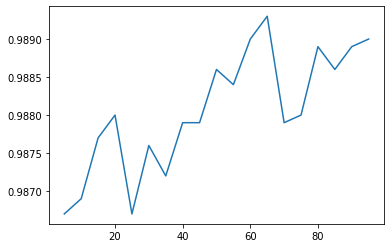

In [11]:
plt.plot(num_epochs,test_accuracies)

Looks like we get increasing accuracy by increasing the number of epochs run.

# Dropout Value Experiment
  In this section, the dropout is varied. 

In [12]:
# Try different values for droput, run for 100 epochs
test_accuracies = []
dropout_values = []

for d in np.arange(0.1, 1.0, 0.05):
    print("Current dropout value: ", d)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Dropout(d))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(d))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    
    model.fit(x_train, y_train, batch_size=batch_size,epochs=n,
         verbose=1,validation_data=(x_test,y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(score[1])
    dropout_values.append(d)

Current dropout value:  0.1
Train on 60000 samples, validate on 10000 samples
Epoch 1/95
60000/60000 [==============================] - 10s 163us/step - loss: 3.5711 - acc: 0.7528 - val_loss: 0.0606 - val_acc: 0.9795
Epoch 2/95
60000/60000 [==============================] - 9s 155us/step - loss: 0.0606 - acc: 0.9823 - val_loss: 0.0555 - val_acc: 0.9817
Epoch 3/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0258 - acc: 0.9921 - val_loss: 0.0590 - val_acc: 0.9829
Epoch 4/95
60000/60000 [==============================] - 9s 155us/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.0505 - val_acc: 0.9860
Epoch 5/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0071 - acc: 0.9975 - val_loss: 0.0550 - val_acc: 0.9872
Epoch 6/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0051 - acc: 0.9982 - val_loss: 0.0539 - val_acc: 0.9877
Epoch 7/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0041 - acc:

60000/60000 [==============================] - 9s 158us/step - loss: 7.7841e-04 - acc: 0.9998 - val_loss: 0.1104 - val_acc: 0.9882
Epoch 59/95
60000/60000 [==============================] - 9s 156us/step - loss: 6.3899e-04 - acc: 0.9999 - val_loss: 0.1079 - val_acc: 0.9878
Epoch 60/95
60000/60000 [==============================] - 9s 156us/step - loss: 3.1595e-04 - acc: 0.9999 - val_loss: 0.1069 - val_acc: 0.9887
Epoch 61/95
60000/60000 [==============================] - 9s 158us/step - loss: 2.2675e-04 - acc: 1.0000 - val_loss: 0.1074 - val_acc: 0.9883
Epoch 62/95
60000/60000 [==============================] - 9s 157us/step - loss: 1.6195e-04 - acc: 0.9999 - val_loss: 0.1099 - val_acc: 0.9877
Epoch 63/95
60000/60000 [==============================] - 9s 157us/step - loss: 1.6263e-04 - acc: 0.9999 - val_loss: 0.1034 - val_acc: 0.9891
Epoch 64/95
60000/60000 [==============================] - 9s 157us/step - loss: 6.9450e-04 - acc: 0.9999 - val_loss: 0.1063 - val_acc: 0.9898
Epoch 65/95

60000/60000 [==============================] - 9s 158us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0740 - val_acc: 0.9899
Epoch 21/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0816 - val_acc: 0.9889
Epoch 22/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0849 - val_acc: 0.9888
Epoch 23/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0828 - val_acc: 0.9889
Epoch 24/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0821 - val_acc: 0.9887
Epoch 25/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0923 - val_acc: 0.9885
Epoch 26/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0010 - acc: 0.9997 - val_loss: 0.0965 - val_acc: 0.9879
Epoch 27/95
60000/60000 [=========

60000/60000 [==============================] - 9s 155us/step - loss: 7.3077e-04 - acc: 0.9999 - val_loss: 0.1012 - val_acc: 0.9888
Epoch 79/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.1099 - val_acc: 0.9890
Epoch 80/95
60000/60000 [==============================] - 9s 157us/step - loss: 5.5787e-04 - acc: 0.9999 - val_loss: 0.1045 - val_acc: 0.9888
Epoch 81/95
60000/60000 [==============================] - 9s 157us/step - loss: 7.1889e-04 - acc: 0.9999 - val_loss: 0.1001 - val_acc: 0.9890
Epoch 82/95
60000/60000 [==============================] - 9s 158us/step - loss: 9.0010e-04 - acc: 0.9998 - val_loss: 0.1098 - val_acc: 0.9888
Epoch 83/95
60000/60000 [==============================] - 9s 157us/step - loss: 6.0009e-04 - acc: 0.9998 - val_loss: 0.1070 - val_acc: 0.9884
Epoch 84/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1010 - val_acc: 0.9891
Epoch 85/95
60000/6

Epoch 41/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.1136 - val_acc: 0.9874
Epoch 42/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0922 - val_acc: 0.9887
Epoch 43/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0998 - val_acc: 0.9878
Epoch 44/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1022 - val_acc: 0.9886
Epoch 45/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0990 - val_acc: 0.9889
Epoch 46/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0901 - val_acc: 0.9889
Epoch 47/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0864 - val_acc: 0.9883
Epoch 48/95
60000/60000

60000/60000 [==============================] - 9s 156us/step - loss: 0.0249 - acc: 0.9925 - val_loss: 0.0426 - val_acc: 0.9882
Epoch 5/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0.0446 - val_acc: 0.9882
Epoch 6/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 0.0574 - val_acc: 0.9870
Epoch 7/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0527 - val_acc: 0.9880
Epoch 8/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0089 - acc: 0.9974 - val_loss: 0.0677 - val_acc: 0.9876
Epoch 9/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0073 - acc: 0.9978 - val_loss: 0.0591 - val_acc: 0.9883
Epoch 10/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.0654 - val_acc: 0.9887
Epoch 11/95
60000/60000 [==================

60000/60000 [==============================] - 10s 159us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.1068 - val_acc: 0.9887
Epoch 64/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0985 - val_acc: 0.9901
Epoch 65/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0022 - acc: 0.9996 - val_loss: 0.1016 - val_acc: 0.9893
Epoch 66/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0990 - val_acc: 0.9892
Epoch 67/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.1165 - val_acc: 0.9889
Epoch 68/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.1107 - val_acc: 0.9882
Epoch 69/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.1066 - val_acc: 0.9892
Epoch 70/95
60000/60000 [===========

60000/60000 [==============================] - 9s 156us/step - loss: 0.0043 - acc: 0.9989 - val_loss: 0.0737 - val_acc: 0.9887
Epoch 27/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.0723 - val_acc: 0.9887
Epoch 28/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0910 - val_acc: 0.9888
Epoch 29/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0690 - val_acc: 0.9892
Epoch 30/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0881 - val_acc: 0.9886
Epoch 31/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0043 - acc: 0.9990 - val_loss: 0.0839 - val_acc: 0.9881
Epoch 32/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0760 - val_acc: 0.9887
Epoch 33/95
60000/60000 [===========

Epoch 85/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0951 - val_acc: 0.9892
Epoch 86/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0944 - val_acc: 0.9892
Epoch 87/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.1026 - val_acc: 0.9906
Epoch 88/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.1137 - val_acc: 0.9885
Epoch 89/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0994 - val_acc: 0.9896
Epoch 90/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0903 - val_acc: 0.9899
Epoch 91/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0020 - acc: 0.9997 - val_loss: 0.0953 - val_acc: 0.9892
Epoch 92/95
60000/60000 [==

60000/60000 [==============================] - 10s 161us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.0842 - val_acc: 0.9899
Epoch 49/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0776 - val_acc: 0.9892
Epoch 50/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0035 - acc: 0.9992 - val_loss: 0.0937 - val_acc: 0.9888
Epoch 51/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.0851 - val_acc: 0.9897
Epoch 52/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.0839 - val_acc: 0.9890
Epoch 53/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0814 - val_acc: 0.9886
Epoch 54/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0971 - val_acc: 0.9881
Epoch 55/95
60000/60000 [=========

60000/60000 [==============================] - 10s 159us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0627 - val_acc: 0.9865
Epoch 12/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0570 - val_acc: 0.9882
Epoch 13/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0575 - val_acc: 0.9890
Epoch 14/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0112 - acc: 0.9967 - val_loss: 0.0573 - val_acc: 0.9894
Epoch 15/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0609 - val_acc: 0.9882
Epoch 16/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0557 - val_acc: 0.9883
Epoch 17/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0651 - val_acc: 0.9879
Epoch 18/95
60000/60000 [==========

Epoch 70/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0048 - acc: 0.9989 - val_loss: 0.0883 - val_acc: 0.9898
Epoch 71/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0039 - acc: 0.9992 - val_loss: 0.0949 - val_acc: 0.9900
Epoch 72/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0038 - acc: 0.9992 - val_loss: 0.0998 - val_acc: 0.9885
Epoch 73/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.0902 - val_acc: 0.9901
Epoch 74/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0993 - val_acc: 0.9893
Epoch 75/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0997 - val_acc: 0.9891
Epoch 76/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0048 - acc: 0.9988 - val_loss: 0.1006 - val_acc: 0.9898
Epoch 77/95
60000/60000

60000/60000 [==============================] - 10s 160us/step - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0925 - val_acc: 0.9880
Epoch 34/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0173 - acc: 0.9957 - val_loss: 0.0833 - val_acc: 0.9879
Epoch 35/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0197 - acc: 0.9949 - val_loss: 0.0567 - val_acc: 0.9893
Epoch 36/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0190 - acc: 0.9952 - val_loss: 0.0772 - val_acc: 0.9888
Epoch 37/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0182 - acc: 0.9953 - val_loss: 0.0612 - val_acc: 0.9884
Epoch 38/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0168 - acc: 0.9960 - val_loss: 0.0720 - val_acc: 0.9887
Epoch 39/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0194 - acc: 0.9956 - val_loss: 0.0694 - val_acc: 0.9871
Epoch 40/95
60000/60000 [========

Epoch 92/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0147 - acc: 0.9974 - val_loss: 0.1177 - val_acc: 0.9887
Epoch 93/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0141 - acc: 0.9975 - val_loss: 0.1062 - val_acc: 0.9888
Epoch 94/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0168 - acc: 0.9969 - val_loss: 0.1108 - val_acc: 0.9899
Epoch 95/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0114 - acc: 0.9977 - val_loss: 0.1041 - val_acc: 0.9895
Current dropout value:  0.5000000000000001
Train on 60000 samples, validate on 10000 samples
Epoch 1/95
60000/60000 [==============================] - 10s 171us/step - loss: 1.2479 - acc: 0.8624 - val_loss: 0.0684 - val_acc: 0.9780
Epoch 2/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1262 - acc: 0.9641 - val_loss: 0.0542 - val_acc: 0.9831
Epoch 3/95
60000/60000 [==============================] - 9s 157us/step

60000/60000 [==============================] - 10s 161us/step - loss: 0.0274 - acc: 0.9940 - val_loss: 0.0725 - val_acc: 0.9888
Epoch 56/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0250 - acc: 0.9941 - val_loss: 0.0704 - val_acc: 0.9894
Epoch 57/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0253 - acc: 0.9941 - val_loss: 0.0582 - val_acc: 0.9882
Epoch 58/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.0257 - acc: 0.9942 - val_loss: 0.0739 - val_acc: 0.9873
Epoch 59/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0299 - acc: 0.9938 - val_loss: 0.0813 - val_acc: 0.9894
Epoch 60/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0258 - acc: 0.9945 - val_loss: 0.0817 - val_acc: 0.9883
Epoch 61/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0278 - acc: 0.9940 - val_loss: 0.0968 - val_acc: 0.9878
Epoch 62/95
60000/60000 [=======

60000/60000 [==============================] - 9s 158us/step - loss: 0.0544 - acc: 0.9860 - val_loss: 0.0489 - val_acc: 0.9869
Epoch 19/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0571 - acc: 0.9851 - val_loss: 0.0501 - val_acc: 0.9876
Epoch 20/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0533 - acc: 0.9868 - val_loss: 0.0471 - val_acc: 0.9872
Epoch 21/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0553 - acc: 0.9858 - val_loss: 0.0455 - val_acc: 0.9876
Epoch 22/95
60000/60000 [==============================] - 9s 156us/step - loss: 0.0532 - acc: 0.9870 - val_loss: 0.0518 - val_acc: 0.9878
Epoch 23/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0546 - acc: 0.9869 - val_loss: 0.0635 - val_acc: 0.9876
Epoch 24/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0466 - acc: 0.9880 - val_loss: 0.0647 - val_acc: 0.9866
Epoch 25/95
60000/60000 [==========

Epoch 77/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0407 - acc: 0.9911 - val_loss: 0.0927 - val_acc: 0.9859
Epoch 78/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0393 - acc: 0.9910 - val_loss: 0.0666 - val_acc: 0.9859
Epoch 79/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0425 - acc: 0.9913 - val_loss: 0.0743 - val_acc: 0.9873
Epoch 80/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0458 - acc: 0.9902 - val_loss: 0.0659 - val_acc: 0.9870
Epoch 81/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0418 - acc: 0.9909 - val_loss: 0.0913 - val_acc: 0.9875
Epoch 82/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0408 - acc: 0.9912 - val_loss: 0.0951 - val_acc: 0.9871
Epoch 83/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0403 - acc: 0.9916 - val_loss: 0.0843 - val_acc: 0.9880
Epoch 84/95
60000/60000

60000/60000 [==============================] - 10s 160us/step - loss: 0.0559 - acc: 0.9866 - val_loss: 0.0584 - val_acc: 0.9885
Epoch 41/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0587 - acc: 0.9862 - val_loss: 0.0494 - val_acc: 0.9886
Epoch 42/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0583 - acc: 0.9865 - val_loss: 0.0534 - val_acc: 0.9878
Epoch 43/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0554 - acc: 0.9868 - val_loss: 0.0588 - val_acc: 0.9889
Epoch 44/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0578 - acc: 0.9858 - val_loss: 0.0546 - val_acc: 0.9875
Epoch 45/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0558 - acc: 0.9868 - val_loss: 0.0552 - val_acc: 0.9885
Epoch 46/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0553 - acc: 0.9864 - val_loss: 0.0682 - val_acc: 0.9878
Epoch 47/95
60000/60000 [=======

60000/60000 [==============================] - 10s 160us/step - loss: 0.1662 - acc: 0.9541 - val_loss: 0.0623 - val_acc: 0.9795
Epoch 4/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1479 - acc: 0.9594 - val_loss: 0.0630 - val_acc: 0.9811
Epoch 5/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1380 - acc: 0.9626 - val_loss: 0.0659 - val_acc: 0.9799
Epoch 6/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1358 - acc: 0.9639 - val_loss: 0.0529 - val_acc: 0.9836
Epoch 7/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1289 - acc: 0.9667 - val_loss: 0.0491 - val_acc: 0.9849
Epoch 8/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.1205 - acc: 0.9683 - val_loss: 0.0507 - val_acc: 0.9842
Epoch 9/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1197 - acc: 0.9693 - val_loss: 0.0506 - val_acc: 0.9847
Epoch 10/95
60000/60000 [=============

Epoch 62/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0846 - acc: 0.9810 - val_loss: 0.0473 - val_acc: 0.9864
Epoch 63/95
60000/60000 [==============================] - 10s 158us/step - loss: 0.0774 - acc: 0.9815 - val_loss: 0.0600 - val_acc: 0.9877
Epoch 64/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0800 - acc: 0.9810 - val_loss: 0.0537 - val_acc: 0.9876
Epoch 65/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0746 - acc: 0.9819 - val_loss: 0.0465 - val_acc: 0.9875
Epoch 66/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0781 - acc: 0.9820 - val_loss: 0.0536 - val_acc: 0.9875
Epoch 67/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0801 - acc: 0.9814 - val_loss: 0.0831 - val_acc: 0.9858
Epoch 68/95
60000/60000 [==============================] - 9s 157us/step - loss: 0.0766 - acc: 0.9823 - val_loss: 0.0760 - val_acc: 0.9860
Epoch 69/95
60000/60000 

60000/60000 [==============================] - 10s 161us/step - loss: 0.1218 - acc: 0.9707 - val_loss: 0.0460 - val_acc: 0.9862
Epoch 26/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1164 - acc: 0.9710 - val_loss: 0.0508 - val_acc: 0.9872
Epoch 27/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1218 - acc: 0.9700 - val_loss: 0.0531 - val_acc: 0.9857
Epoch 28/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1206 - acc: 0.9714 - val_loss: 0.0587 - val_acc: 0.9867
Epoch 29/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1139 - acc: 0.9718 - val_loss: 0.0558 - val_acc: 0.9858
Epoch 30/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1153 - acc: 0.9721 - val_loss: 0.0531 - val_acc: 0.9865
Epoch 31/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1125 - acc: 0.9721 - val_loss: 0.0560 - val_acc: 0.9870
Epoch 32/95
60000/60000 [=======

Epoch 84/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0958 - acc: 0.9778 - val_loss: 0.0557 - val_acc: 0.9878
Epoch 85/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0959 - acc: 0.9771 - val_loss: 0.0525 - val_acc: 0.9878
Epoch 86/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0959 - acc: 0.9767 - val_loss: 0.0481 - val_acc: 0.9874
Epoch 87/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.0908 - acc: 0.9772 - val_loss: 0.0587 - val_acc: 0.9874
Epoch 88/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.0946 - acc: 0.9770 - val_loss: 0.0508 - val_acc: 0.9858
Epoch 89/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.0988 - acc: 0.9761 - val_loss: 0.0537 - val_acc: 0.9875
Epoch 90/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.0996 - acc: 0.9760 - val_loss: 0.0460 - val_acc: 0.9881
Epoch 91/95
60000/600

Epoch 47/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1478 - acc: 0.9629 - val_loss: 0.1839 - val_acc: 0.9654
Epoch 48/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1469 - acc: 0.9629 - val_loss: 0.0669 - val_acc: 0.9845
Epoch 49/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1442 - acc: 0.9639 - val_loss: 0.0495 - val_acc: 0.9851
Epoch 50/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1459 - acc: 0.9634 - val_loss: 0.0509 - val_acc: 0.9836
Epoch 51/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1431 - acc: 0.9645 - val_loss: 0.0591 - val_acc: 0.9839
Epoch 52/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1424 - acc: 0.9642 - val_loss: 0.1068 - val_acc: 0.9738
Epoch 53/95
60000/60000 [==============================] - 10s 163us/step - loss: 0.1393 - acc: 0.9645 - val_loss: 0.0566 - val_acc: 0.9848
Epoch 54/95
60000/60

Epoch 10/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.2633 - acc: 0.9275 - val_loss: 0.0788 - val_acc: 0.9801
Epoch 11/95
60000/60000 [==============================] - 10s 163us/step - loss: 0.2651 - acc: 0.9269 - val_loss: 0.0655 - val_acc: 0.9807
Epoch 12/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.2563 - acc: 0.9299 - val_loss: 0.0754 - val_acc: 0.9779
Epoch 13/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.2476 - acc: 0.9326 - val_loss: 0.0640 - val_acc: 0.9822
Epoch 14/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.2521 - acc: 0.9320 - val_loss: 0.0656 - val_acc: 0.9809
Epoch 15/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.2482 - acc: 0.9342 - val_loss: 0.0659 - val_acc: 0.9811
Epoch 16/95
60000/60000 [==============================] - 10s 163us/step - loss: 0.2437 - acc: 0.9346 - val_loss: 0.0711 - val_acc: 0.9794
Epoch 17/95
60000/60

60000/60000 [==============================] - 10s 158us/step - loss: 0.2010 - acc: 0.9480 - val_loss: 0.0530 - val_acc: 0.9843
Epoch 69/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.1993 - acc: 0.9494 - val_loss: 0.0533 - val_acc: 0.9844
Epoch 70/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1946 - acc: 0.9496 - val_loss: 0.0605 - val_acc: 0.9821
Epoch 71/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1946 - acc: 0.9490 - val_loss: 0.0633 - val_acc: 0.9842
Epoch 72/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1987 - acc: 0.9490 - val_loss: 0.0514 - val_acc: 0.9842
Epoch 73/95
60000/60000 [==============================] - 10s 159us/step - loss: 0.1996 - acc: 0.9476 - val_loss: 0.0518 - val_acc: 0.9856
Epoch 74/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.1939 - acc: 0.9488 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 75/95
60000/60000 [=======

60000/60000 [==============================] - 10s 161us/step - loss: 0.3754 - acc: 0.8874 - val_loss: 0.0933 - val_acc: 0.9733
Epoch 32/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.3675 - acc: 0.8887 - val_loss: 0.0937 - val_acc: 0.9739
Epoch 33/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.3747 - acc: 0.8885 - val_loss: 0.0908 - val_acc: 0.9740
Epoch 34/95
60000/60000 [==============================] - 10s 164us/step - loss: 0.3764 - acc: 0.8883 - val_loss: 0.1011 - val_acc: 0.9729
Epoch 35/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.3604 - acc: 0.8907 - val_loss: 0.1005 - val_acc: 0.9720
Epoch 36/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.3727 - acc: 0.8884 - val_loss: 0.0856 - val_acc: 0.9755
Epoch 37/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.3608 - acc: 0.8929 - val_loss: 0.1013 - val_acc: 0.9719
Epoch 38/95
60000/60000 [========

60000/60000 [==============================] - 10s 160us/step - loss: 0.3970 - acc: 0.8924 - val_loss: 0.0840 - val_acc: 0.9754
Epoch 90/95
60000/60000 [==============================] - 10s 163us/step - loss: 0.3808 - acc: 0.8971 - val_loss: 0.0888 - val_acc: 0.9733
Epoch 91/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.3833 - acc: 0.8941 - val_loss: 0.0915 - val_acc: 0.9763
Epoch 92/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.3845 - acc: 0.8947 - val_loss: 0.0862 - val_acc: 0.9755
Epoch 93/95
60000/60000 [==============================] - 10s 160us/step - loss: 0.3821 - acc: 0.8947 - val_loss: 0.0877 - val_acc: 0.9741
Epoch 94/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.3793 - acc: 0.8965 - val_loss: 0.0931 - val_acc: 0.9757
Epoch 95/95
60000/60000 [==============================] - 9s 158us/step - loss: 0.3773 - acc: 0.8959 - val_loss: 0.0939 - val_acc: 0.9736
Current dropout value:  0.9000000

60000/60000 [==============================] - 10s 162us/step - loss: 0.6669 - acc: 0.7957 - val_loss: 0.1303 - val_acc: 0.9665
Epoch 53/95
60000/60000 [==============================] - 10s 164us/step - loss: 0.6580 - acc: 0.7960 - val_loss: 0.1612 - val_acc: 0.9604
Epoch 54/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.6690 - acc: 0.7944 - val_loss: 0.1326 - val_acc: 0.9655
Epoch 55/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.6657 - acc: 0.7926 - val_loss: 0.1481 - val_acc: 0.9626
Epoch 56/95
60000/60000 [==============================] - 10s 162us/step - loss: 0.6658 - acc: 0.7953 - val_loss: 0.1631 - val_acc: 0.9592
Epoch 57/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.6759 - acc: 0.7912 - val_loss: 0.1839 - val_acc: 0.9551
Epoch 58/95
60000/60000 [==============================] - 10s 161us/step - loss: 0.6826 - acc: 0.7916 - val_loss: 0.1412 - val_acc: 0.9626
Epoch 59/95
60000/60000 [=======

60000/60000 [==============================] - 10s 160us/step - loss: 2.3323 - acc: 0.1126 - val_loss: 2.2093 - val_acc: 0.1135
Epoch 16/95
60000/60000 [==============================] - 10s 162us/step - loss: 2.3365 - acc: 0.1126 - val_loss: 2.2727 - val_acc: 0.1135
Epoch 17/95
60000/60000 [==============================] - 10s 164us/step - loss: 2.3262 - acc: 0.1124 - val_loss: 2.2810 - val_acc: 0.1135
Epoch 18/95
60000/60000 [==============================] - 10s 161us/step - loss: 2.3202 - acc: 0.1125 - val_loss: 2.2134 - val_acc: 0.1135
Epoch 19/95
60000/60000 [==============================] - 10s 160us/step - loss: 2.3297 - acc: 0.1124 - val_loss: 2.2418 - val_acc: 0.1135
Epoch 20/95
60000/60000 [==============================] - 10s 163us/step - loss: 2.3289 - acc: 0.1125 - val_loss: 2.2426 - val_acc: 0.1135
Epoch 21/95
60000/60000 [==============================] - 10s 163us/step - loss: 2.3190 - acc: 0.1124 - val_loss: 2.2118 - val_acc: 0.1135
Epoch 22/95
60000/60000 [=======

60000/60000 [==============================] - 10s 161us/step - loss: 1.4930 - acc: 0.4536 - val_loss: 0.7520 - val_acc: 0.8795
Epoch 74/95
60000/60000 [==============================] - 10s 161us/step - loss: 1.4856 - acc: 0.4583 - val_loss: 0.8595 - val_acc: 0.8753
Epoch 75/95
60000/60000 [==============================] - 10s 160us/step - loss: 1.4855 - acc: 0.4634 - val_loss: 0.6813 - val_acc: 0.8825
Epoch 76/95
60000/60000 [==============================] - 10s 162us/step - loss: 1.4828 - acc: 0.4679 - val_loss: 0.7234 - val_acc: 0.8797
Epoch 77/95
60000/60000 [==============================] - 10s 162us/step - loss: 1.4736 - acc: 0.4716 - val_loss: 0.6649 - val_acc: 0.8842
Epoch 78/95
60000/60000 [==============================] - 10s 162us/step - loss: 1.4790 - acc: 0.4689 - val_loss: 0.6499 - val_acc: 0.8855
Epoch 79/95
60000/60000 [==============================] - 10s 160us/step - loss: 1.4791 - acc: 0.4693 - val_loss: 1.1816 - val_acc: 0.7571
Epoch 80/95
60000/60000 [=======

In [13]:
# Print the list of test accuracies, as well as the maximum value
print(test_accuracies)
print("\nMax test accuracy: ", max(test_accuracies))

[0.9897, 0.9886, 0.9899, 0.9893, 0.9896, 0.989, 0.9883, 0.9895, 0.9882, 0.9858, 0.988, 0.9868, 0.9842, 0.9848, 0.9823, 0.9736, 0.9494, 0.8736]

Max test accuracy:  0.9899


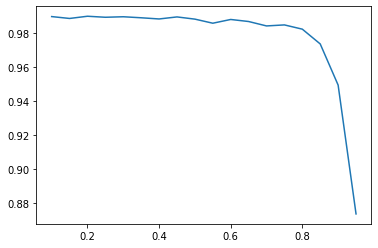

In [14]:
plt.plot(dropout_values, test_accuracies)

That was an interesting experiment! Looks like the optimum dropout would be somewhere around 0.2 to 0.3. 

# MaxPooling Experiment
  Now a MaxPooling layer is added.

In [15]:
# Try with the above network, but add a MaxPooling layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
    
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
__________

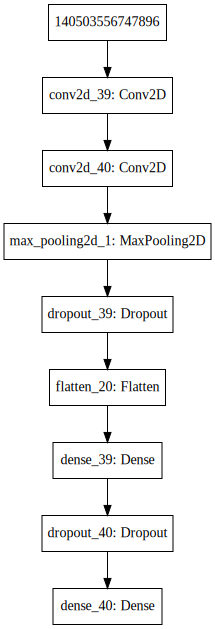

In [16]:
SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
model.fit(x_train, y_train, batch_size=batch_size,epochs=10,
         verbose=1,validation_data=(x_test,y_test))
    
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.8126 - acc: 0.9085 - val_loss: 0.0661 - val_acc: 0.9804
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0775 - acc: 0.9771 - val_loss: 0.0435 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0510 - acc: 0.9848 - val_loss: 0.0418 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0432 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0360 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0243 - acc: 0.9926 - val_loss: 0.0362 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0442 - val_

In [18]:
print("Test accuracy: ", score[1])

Test accuracy:  0.9909


This seems to be the highest accuracy yet! Seems as though MaxPooling definetly helps to improve accuracy. You can see that MaxPooling does help the model to better generalize.

# Deeper Network Experiment
  Now the network has been deepend by adding another block of convolutio and maxpooling.

In [19]:
# Deeper network

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
    
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 5, 64)          0         
__________

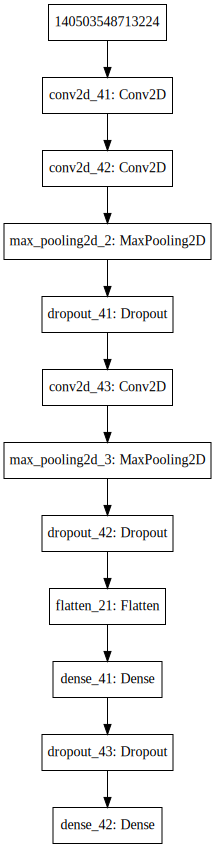

In [20]:
SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

In [21]:
model.fit(x_train, y_train, batch_size=batch_size,epochs=10,
         verbose=1,validation_data=(x_test,y_test))
    
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 1.6397 - acc: 0.8339 - val_loss: 0.0572 - val_acc: 0.9822
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1071 - acc: 0.9680 - val_loss: 0.0407 - val_acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0759 - acc: 0.9775 - val_loss: 0.0360 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0582 - acc: 0.9825 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0517 - acc: 0.9848 - val_loss: 0.0288 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0442 - acc: 0.9867 - val_loss: 0.0254 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0363 - acc: 0.9889 - val_loss: 0.0247 - 

In [22]:
print("Test accuracy: ", score[1])

Test accuracy:  0.9918


Adding another convolution and maxpooling layer does give a small improvement in accuracy, and didn't seem to have a large negative impact on the training time. The number of parameters were reduced as well.

# Try varying the batch size

Now, we're going to try varying the batch size, and see how the batch size affects the performance of the basic conv net.

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_46 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               4718720   
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
Total para

In [25]:
# Vary the batch size from 2 to 256, with increments of 2, and track the test accuracy
# Each batch size test will be trained for 10 epochs
test_accuracies = []
batch_sizes = []

for batch_size in range(2, 258, 2):
    model.fit(x_train, y_train, batch_size=batch_size,epochs=10,
         verbose=1,validation_data=(x_test,y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(score[1])
    batch_sizes.append(batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 310s 5ms/step - loss: 1.5940 - acc: 0.8436 - val_loss: 0.1510 - val_acc: 0.9599
Epoch 2/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.3062 - acc: 0.9319 - val_loss: 0.1808 - val_acc: 0.9563
Epoch 3/10
60000/60000 [==============================] - 297s 5ms/step - loss: 0.3236 - acc: 0.9367 - val_loss: 0.2905 - val_acc: 0.9653
Epoch 4/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.3436 - acc: 0.9403 - val_loss: 0.1727 - val_acc: 0.9624
Epoch 5/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.3365 - acc: 0.9367 - val_loss: 0.1896 - val_acc: 0.9579
Epoch 6/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.3398 - acc: 0.9306 - val_loss: 0.2423 - val_acc: 0.9501
Epoch 7/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.3208 - acc: 0.9329 - val_loss: 0.1580 - 

60000/60000 [==============================] - 54s 893us/step - loss: 0.1999 - acc: 0.9475 - val_loss: 0.1297 - val_acc: 0.9619
Epoch 9/10
60000/60000 [==============================] - 54s 894us/step - loss: 0.1966 - acc: 0.9473 - val_loss: 0.1839 - val_acc: 0.9572
Epoch 10/10
60000/60000 [==============================] - 54s 895us/step - loss: 0.1952 - acc: 0.9472 - val_loss: 0.1341 - val_acc: 0.9614
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.1942 - acc: 0.9488 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 2/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.1865 - acc: 0.9489 - val_loss: 0.1261 - val_acc: 0.9630
Epoch 3/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.1885 - acc: 0.9495 - val_loss: 0.1343 - val_acc: 0.9625
Epoch 4/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.1816 - acc: 0.9502 - val_loss: 0.1279 - val

Epoch 5/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.1420 - acc: 0.9623 - val_loss: 0.1333 - val_acc: 0.9634
Epoch 6/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.1370 - acc: 0.9631 - val_loss: 0.1089 - val_acc: 0.9668
Epoch 7/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.1380 - acc: 0.9631 - val_loss: 0.1343 - val_acc: 0.9655
Epoch 8/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.1357 - acc: 0.9630 - val_loss: 0.1063 - val_acc: 0.9686
Epoch 9/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.1371 - acc: 0.9639 - val_loss: 0.1170 - val_acc: 0.9690
Epoch 10/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.1368 - acc: 0.9642 - val_loss: 0.2165 - val_acc: 0.9566
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.1347 - acc: 0.9636 - val_loss: 0

Epoch 2/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.1095 - acc: 0.9715 - val_loss: 0.1273 - val_acc: 0.9680
Epoch 3/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.1048 - acc: 0.9720 - val_loss: 0.1418 - val_acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.1018 - acc: 0.9722 - val_loss: 0.1068 - val_acc: 0.9690
Epoch 5/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.1077 - acc: 0.9720 - val_loss: 0.1175 - val_acc: 0.9684
Epoch 6/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.1037 - acc: 0.9723 - val_loss: 0.1275 - val_acc: 0.9692
Epoch 7/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.1082 - acc: 0.9714 - val_loss: 0.1247 - val_acc: 0.9703
Epoch 8/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.1005 - acc: 0.9723 - val_loss: 0.1212 - val_acc: 0.9698
Epoch 9/10
60000/60000 [===

60000/60000 [==============================] - 18s 302us/step - loss: 0.0839 - acc: 0.9782 - val_loss: 0.4193 - val_acc: 0.9030
Epoch 10/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0798 - acc: 0.9784 - val_loss: 0.1371 - val_acc: 0.9691
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0822 - acc: 0.9778 - val_loss: 0.1287 - val_acc: 0.9708
Epoch 2/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0828 - acc: 0.9783 - val_loss: 0.1035 - val_acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0827 - acc: 0.9778 - val_loss: 0.1394 - val_acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0788 - acc: 0.9785 - val_loss: 0.1171 - val_acc: 0.9718
Epoch 5/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0776 - acc: 0.9791 - val_loss: 0.1237 - val

Epoch 6/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0677 - acc: 0.9823 - val_loss: 0.1127 - val_acc: 0.9719
Epoch 7/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0637 - acc: 0.9829 - val_loss: 0.3292 - val_acc: 0.9438
Epoch 8/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0678 - acc: 0.9819 - val_loss: 0.1213 - val_acc: 0.9710
Epoch 9/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0652 - acc: 0.9822 - val_loss: 0.1403 - val_acc: 0.9713
Epoch 10/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0670 - acc: 0.9825 - val_loss: 0.1162 - val_acc: 0.9711
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0644 - acc: 0.9822 - val_loss: 0.1239 - val_acc: 0.9705
Epoch 2/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0626 - acc: 0.9831 - val_loss: 0

Epoch 3/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0544 - acc: 0.9854 - val_loss: 0.1436 - val_acc: 0.9724
Epoch 4/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0507 - acc: 0.9857 - val_loss: 0.1225 - val_acc: 0.9714
Epoch 5/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0505 - acc: 0.9860 - val_loss: 0.1211 - val_acc: 0.9712
Epoch 6/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0544 - acc: 0.9852 - val_loss: 0.1370 - val_acc: 0.9711
Epoch 7/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0540 - acc: 0.9850 - val_loss: 0.1267 - val_acc: 0.9715
Epoch 8/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0499 - acc: 0.9858 - val_loss: 0.1252 - val_acc: 0.9704
Epoch 9/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0494 - acc: 0.9860 - val_loss: 0.1348 - val_acc: 0.9717
Epoch 10/10
60000/60000 [==

60000/60000 [==============================] - 13s 214us/step - loss: 0.0481 - acc: 0.9874 - val_loss: 0.1239 - val_acc: 0.9717
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 208us/step - loss: 0.0414 - acc: 0.9886 - val_loss: 0.1324 - val_acc: 0.9705
Epoch 2/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0480 - acc: 0.9872 - val_loss: 0.1474 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0442 - acc: 0.9878 - val_loss: 0.1330 - val_acc: 0.9714
Epoch 4/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0418 - acc: 0.9885 - val_loss: 0.1497 - val_acc: 0.9715
Epoch 5/10
60000/60000 [==============================] - 13s 208us/step - loss: 0.0478 - acc: 0.9875 - val_loss: 0.1591 - val_acc: 0.9699
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0413 - acc: 0.9884 - val_loss: 0.1303 - val_

Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0389 - acc: 0.9888 - val_loss: 0.1543 - val_acc: 0.9718
Epoch 8/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0371 - acc: 0.9893 - val_loss: 0.1586 - val_acc: 0.9710
Epoch 9/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0389 - acc: 0.9894 - val_loss: 0.1388 - val_acc: 0.9725
Epoch 10/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0336 - acc: 0.9903 - val_loss: 0.1134 - val_acc: 0.9678
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0364 - acc: 0.9898 - val_loss: 0.1834 - val_acc: 0.9719
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0414 - acc: 0.9896 - val_loss: 0.2141 - val_acc: 0.9686
Epoch 3/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0375 - acc: 0.9899 - val_loss: 0

Epoch 4/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0310 - acc: 0.9912 - val_loss: 0.1548 - val_acc: 0.9570
Epoch 5/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0353 - acc: 0.9899 - val_loss: 0.1567 - val_acc: 0.9728
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0342 - acc: 0.9907 - val_loss: 0.1218 - val_acc: 0.9715
Epoch 7/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0370 - acc: 0.9901 - val_loss: 0.1319 - val_acc: 0.9627
Epoch 8/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0341 - acc: 0.9902 - val_loss: 0.1421 - val_acc: 0.9714
Epoch 9/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0338 - acc: 0.9906 - val_loss: 0.1415 - val_acc: 0.9724
Epoch 10/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0348 - acc: 0.9903 - val_loss: 0.1060 - val_acc: 0.9718
Train on 60000 samples, va

60000/60000 [==============================] - 10s 169us/step - loss: 0.0293 - acc: 0.9914 - val_loss: 0.1517 - val_acc: 0.9725
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0321 - acc: 0.9913 - val_loss: 0.1087 - val_acc: 0.9708
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0325 - acc: 0.9916 - val_loss: 0.1360 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0321 - acc: 0.9916 - val_loss: 0.1340 - val_acc: 0.9713
Epoch 5/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0297 - acc: 0.9919 - val_loss: 0.1479 - val_acc: 0.9733
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0306 - acc: 0.9920 - val_loss: 0.1486 - val_acc: 0.9721
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0280 - acc: 0.9923 - val_loss: 0.1166 - val_acc: 0.9713
Epoch 8/10
60000/60000 [==============

60000/60000 [==============================] - 10s 168us/step - loss: 0.0268 - acc: 0.9919 - val_loss: 0.1438 - val_acc: 0.9730
Epoch 9/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0248 - acc: 0.9931 - val_loss: 0.1480 - val_acc: 0.9724
Epoch 10/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0260 - acc: 0.9925 - val_loss: 0.1615 - val_acc: 0.9729
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0292 - acc: 0.9920 - val_loss: 0.1305 - val_acc: 0.9724
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0267 - acc: 0.9919 - val_loss: 0.1256 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0255 - acc: 0.9927 - val_loss: 0.1400 - val_acc: 0.9725
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0243 - acc: 0.9928 - val_loss: 0.1496 - val

Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0252 - acc: 0.9937 - val_loss: 0.1051 - val_acc: 0.9707
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0257 - acc: 0.9928 - val_loss: 0.1110 - val_acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0241 - acc: 0.9934 - val_loss: 0.1499 - val_acc: 0.9732
Epoch 8/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0272 - acc: 0.9928 - val_loss: 0.1632 - val_acc: 0.9725
Epoch 9/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0243 - acc: 0.9929 - val_loss: 0.1663 - val_acc: 0.9728
Epoch 10/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0229 - acc: 0.9936 - val_loss: 0.1442 - val_acc: 0.9722
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0242 - acc: 0.9936 - val_loss: 0

60000/60000 [==============================] - 9s 154us/step - loss: 0.0238 - acc: 0.9938 - val_loss: 0.1375 - val_acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0237 - acc: 0.9937 - val_loss: 0.1534 - val_acc: 0.9731
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0201 - acc: 0.9940 - val_loss: 0.1603 - val_acc: 0.9732
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0287 - acc: 0.9932 - val_loss: 0.1388 - val_acc: 0.9732
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0211 - acc: 0.9939 - val_loss: 0.1908 - val_acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0235 - acc: 0.9938 - val_loss: 0.1567 - val_acc: 0.9727
Epoch 8/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0199 - acc: 0.9941 - val_loss: 0.1438 - val_acc: 0.9739
Epoch 9/10
60000/60000 [=====================

60000/60000 [==============================] - 9s 148us/step - loss: 0.0201 - acc: 0.9940 - val_loss: 0.1467 - val_acc: 0.9734
Epoch 10/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0211 - acc: 0.9938 - val_loss: 0.1288 - val_acc: 0.9722
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0191 - acc: 0.9949 - val_loss: 0.1273 - val_acc: 0.9715
Epoch 2/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0211 - acc: 0.9944 - val_loss: 0.1596 - val_acc: 0.9709
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0195 - acc: 0.9945 - val_loss: 0.1811 - val_acc: 0.9735
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0207 - acc: 0.9942 - val_loss: 0.1738 - val_acc: 0.9723
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0202 - acc: 0.9943 - val_loss: 0.1430 - val_acc: 0

60000/60000 [==============================] - 9s 144us/step - loss: 0.0198 - acc: 0.9943 - val_loss: 0.1514 - val_acc: 0.9731
Epoch 7/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0166 - acc: 0.9952 - val_loss: 0.1653 - val_acc: 0.9722
Epoch 8/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0197 - acc: 0.9943 - val_loss: 0.1292 - val_acc: 0.9734
Epoch 9/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0192 - acc: 0.9949 - val_loss: 0.1680 - val_acc: 0.9731
Epoch 10/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0200 - acc: 0.9942 - val_loss: 0.1526 - val_acc: 0.9720
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0190 - acc: 0.9945 - val_loss: 0.1692 - val_acc: 0.9726
Epoch 2/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0198 - acc: 0.9947 - val_loss: 0.1456 - val_acc: 0

60000/60000 [==============================] - 8s 141us/step - loss: 0.0204 - acc: 0.9945 - val_loss: 0.3206 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0184 - acc: 0.9947 - val_loss: 0.1545 - val_acc: 0.9725
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0176 - acc: 0.9953 - val_loss: 0.1435 - val_acc: 0.9724
Epoch 6/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.0201 - acc: 0.9949 - val_loss: 0.1672 - val_acc: 0.9722
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0157 - acc: 0.9954 - val_loss: 0.1268 - val_acc: 0.9734
Epoch 8/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0206 - acc: 0.9946 - val_loss: 0.1172 - val_acc: 0.9714
Epoch 9/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0197 - acc: 0.9947 - val_loss: 0.1103 - val_acc: 0.9671
Epoch 10/10
60000/60000 [====================

60000/60000 [==============================] - 8s 137us/step - loss: 0.0172 - acc: 0.9953 - val_loss: 0.1743 - val_acc: 0.9727
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0196 - acc: 0.9949 - val_loss: 0.1800 - val_acc: 0.9740
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0163 - acc: 0.9955 - val_loss: 0.2061 - val_acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0186 - acc: 0.9954 - val_loss: 0.1469 - val_acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0165 - acc: 0.9953 - val_loss: 0.1966 - val_acc: 0.9708
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.2086 - val_acc: 0.9728
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.1669 - val_acc: 0.

60000/60000 [==============================] - 8s 134us/step - loss: 0.0171 - acc: 0.9951 - val_loss: 0.1287 - val_acc: 0.9726
Epoch 8/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0205 - acc: 0.9949 - val_loss: 0.1824 - val_acc: 0.9740
Epoch 9/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0153 - acc: 0.9955 - val_loss: 0.1889 - val_acc: 0.9723
Epoch 10/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0169 - acc: 0.9954 - val_loss: 0.1736 - val_acc: 0.9745
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0167 - acc: 0.9953 - val_loss: 0.1937 - val_acc: 0.9731
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0199 - acc: 0.9952 - val_loss: 0.1676 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0170 - acc: 0.9956 - val_loss: 0.1693 - val_acc: 0

60000/60000 [==============================] - 8s 129us/step - loss: 0.0152 - acc: 0.9958 - val_loss: 0.1640 - val_acc: 0.9738
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0148 - acc: 0.9957 - val_loss: 0.1856 - val_acc: 0.9737
Epoch 6/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0186 - acc: 0.9957 - val_loss: 0.1883 - val_acc: 0.9734
Epoch 7/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0156 - acc: 0.9955 - val_loss: 0.2112 - val_acc: 0.9721
Epoch 8/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0235 - acc: 0.9950 - val_loss: 0.1211 - val_acc: 0.9714
Epoch 9/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0138 - acc: 0.9961 - val_loss: 0.1714 - val_acc: 0.9721
Epoch 10/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0185 - acc: 0.9955 - val_loss: 0.1440 - val_acc: 0.9745
Train on 60000 samples, validate on 10000 sa

60000/60000 [==============================] - 8s 128us/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.1759 - val_acc: 0.9744
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0141 - acc: 0.9959 - val_loss: 0.1592 - val_acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0149 - acc: 0.9959 - val_loss: 0.1599 - val_acc: 0.9733
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0128 - acc: 0.9964 - val_loss: 0.1918 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0167 - acc: 0.9958 - val_loss: 0.1546 - val_acc: 0.9729
Epoch 6/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0131 - acc: 0.9963 - val_loss: 0.1622 - val_acc: 0.9722
Epoch 7/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0231 - acc: 0.9952 - val_loss: 0.1520 - val_acc: 0.9718
Epoch 8/10
60000/60000 [=====================

60000/60000 [==============================] - 7s 125us/step - loss: 0.0130 - acc: 0.9962 - val_loss: 0.1598 - val_acc: 0.9728
Epoch 9/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0134 - acc: 0.9964 - val_loss: 0.1803 - val_acc: 0.9727
Epoch 10/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0126 - acc: 0.9960 - val_loss: 0.1660 - val_acc: 0.9725
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0152 - acc: 0.9958 - val_loss: 0.1759 - val_acc: 0.9734
Epoch 2/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0145 - acc: 0.9960 - val_loss: 0.1716 - val_acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.1399 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0147 - acc: 0.9957 - val_loss: 0.1641 - val_acc: 0

60000/60000 [==============================] - 7s 123us/step - loss: 0.0136 - acc: 0.9965 - val_loss: 0.1910 - val_acc: 0.9741
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0136 - acc: 0.9961 - val_loss: 0.1949 - val_acc: 0.9736
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0148 - acc: 0.9958 - val_loss: 0.1674 - val_acc: 0.9731
Epoch 8/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0133 - acc: 0.9960 - val_loss: 0.1610 - val_acc: 0.9737
Epoch 9/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0130 - acc: 0.9961 - val_loss: 0.1634 - val_acc: 0.9716
Epoch 10/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0141 - acc: 0.9964 - val_loss: 0.1495 - val_acc: 0.9740
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0127 - acc: 0.9964 - val_loss: 0.1698 - val_acc: 0

In [28]:
# View the list of test accuracies
print(test_accuracies)
print('\n')
print(max(test_accuracies))

[0.9182, 0.9678, 0.9626, 0.9591, 0.9588, 0.9614, 0.8873, 0.9626, 0.9646, 0.9665, 0.9638, 0.9566, 0.9673, 0.9683, 0.9676, 0.9702, 0.9703, 0.9718, 0.9689, 0.9625, 0.9681, 0.9703, 0.9691, 0.9711, 0.967, 0.9703, 0.9705, 0.957, 0.9711, 0.9711, 0.9712, 0.9496, 0.969, 0.9716, 0.9705, 0.9714, 0.9712, 0.9707, 0.967, 0.9717, 0.9724, 0.9734, 0.9709, 0.9685, 0.9719, 0.9678, 0.9723, 0.969, 0.9723, 0.9702, 0.9703, 0.9718, 0.9717, 0.9726, 0.9689, 0.9721, 0.9719, 0.9715, 0.9693, 0.9727, 0.9727, 0.9722, 0.9729, 0.9709, 0.9724, 0.9707, 0.9721, 0.9722, 0.9722, 0.9722, 0.9735, 0.9725, 0.9721, 0.972, 0.9725, 0.9723, 0.9722, 0.9729, 0.9726, 0.9722, 0.9687, 0.9692, 0.9732, 0.9729, 0.9734, 0.972, 0.9718, 0.9731, 0.9734, 0.973, 0.9735, 0.9728, 0.973, 0.9724, 0.9733, 0.9726, 0.9727, 0.9729, 0.9732, 0.9721, 0.9726, 0.9716, 0.9745, 0.9737, 0.9704, 0.9727, 0.9735, 0.9723, 0.9745, 0.9731, 0.9723, 0.9721, 0.9736, 0.9724, 0.9721, 0.9733, 0.9734, 0.9676, 0.9725, 0.9725, 0.9734, 0.9734, 0.9731, 0.9714, 0.9741, 0.974, 0

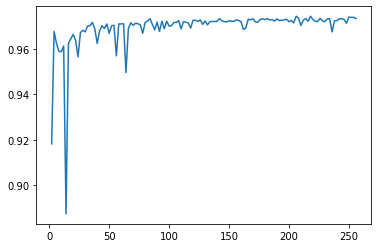

In [27]:
# Plot the test accuracies for each batch size
plt.plot(batch_sizes, test_accuracies)

# Conclusions:

1. Greatest accuracy seems to come from using a deeper network.
2. The second greatest increase in accuracy came from adding a maxpooling layer to a network that didn't have one.
3. Training for more time seems to improve accuracy.
4. Varying the batch size seems to have very limited returns as far as network accuracy in this case.